In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
df_filtered = pd.read_csv(r"C:\Users\Lenovo\Downloads\car_dheko_jupyternotebook\data\df_filtered.csv")

df_filtered.head()

,City,FuelType,BodyType,KmsDriven,TransmissionType,NumberOwner,Insurance,Manufacturer,CarModel,ModelYear,VariantName,Mileage,Engine,Price,No of Cylinder,Seats,AgeOfCar
0,Bangalore,Petrol,Hatchback,120000.0,Manual,3,Third Party,Maruti,Maruti Celerio,2015,VXI,23.0,998,400000.0,3,5,9.0
1,Bangalore,Petrol,SUV,32706.0,Manual,2,Comprehensive,Ford,Ford Ecosport,2018,1.5 Petrol Titanium BSIV,17.0,1497,811000.0,3,5,6.0
2,Bangalore,Petrol,Hatchback,11949.0,Manual,1,Comprehensive,Tata,Tata Tiago,2018,1.2 Revotron XZ,23.0,1199,585000.0,3,5,6.0
3,Bangalore,Petrol,Sedan,17794.0,Manual,1,Comprehensive,Hyundai,Hyundai Xcent,2014,1.2 Kappa S Option,19.0,1197,462000.0,4,5,10.0
4,Bangalore,Diesel,SUV,60000.0,Manual,1,Third Party,Maruti,Maruti SX4 S Cross,2015,DDiS 200 Zeta,23.0,1248,790000.0,4,5,9.0


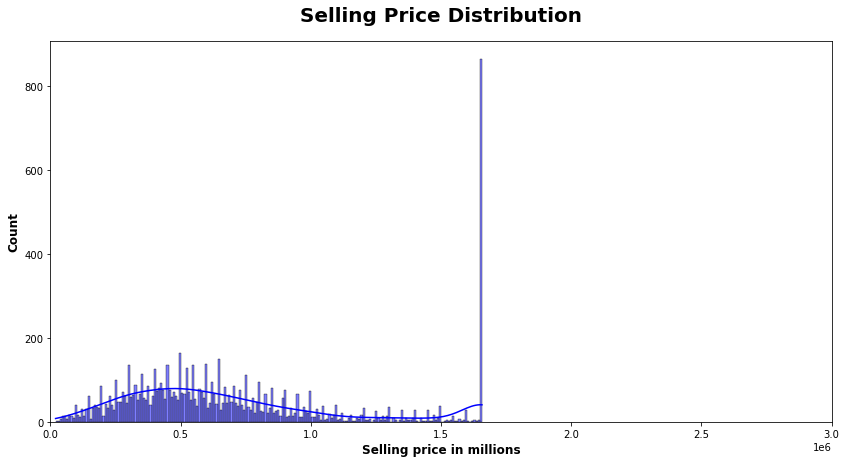

In [3]:
plt.subplots(figsize=(14,7))
sns.histplot(df_filtered.Price, bins=200, kde=True, color = 'b')
plt.title("Selling Price Distribution", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Selling price in millions", weight="bold", fontsize=12)
plt.xlim(0,3000000)
plt.show()

# Top 10 Sold Cars on CarDekho Website

In [4]:
print('-'*50)
print('Top 10 Sold Cars on CarDekho Website')
print('-'*50)

df_filtered.CarModel.value_counts()[0:10]

--------------------------------------------------
Top 10 Sold Cars on CarDekho Website
--------------------------------------------------


Honda City            366
Maruti Swift          347
Hyundai i20           328
Maruti Baleno         291
Hyundai Grand i10     259
Maruti Wagon R        248
Maruti Swift Dzire    248
Hyundai i10           179
Hyundai Verna         179
Honda Amaze           174
Name: CarModel, dtype: int64

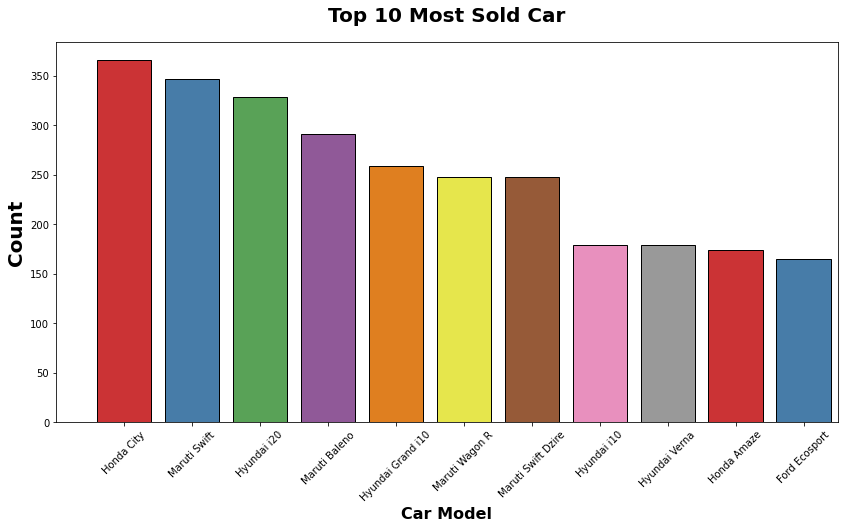

In [5]:
plt.subplots(figsize=(14,7))
sns.countplot(x="CarModel", data=df_filtered,ec = "black",palette="Set1",order = df_filtered['CarModel'].value_counts().index)
plt.title("Top 10 Most Sold Car", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=20)
plt.xlabel("Car Model", weight="bold", fontsize=16)
plt.xticks(rotation= 45)
plt.xlim(-1,10.5)
plt.show()

In [6]:
most_sold_car_model = df_filtered['CarModel'].value_counts().index[0]

topSold = df_filtered[df_filtered['CarModel'] == most_sold_car_model]['Price'].mean()
print(f'The mean price of {most_sold_car_model} is {topSold:.2f} Rupees')

The mean price of Honda City is 696728.14 Rupees


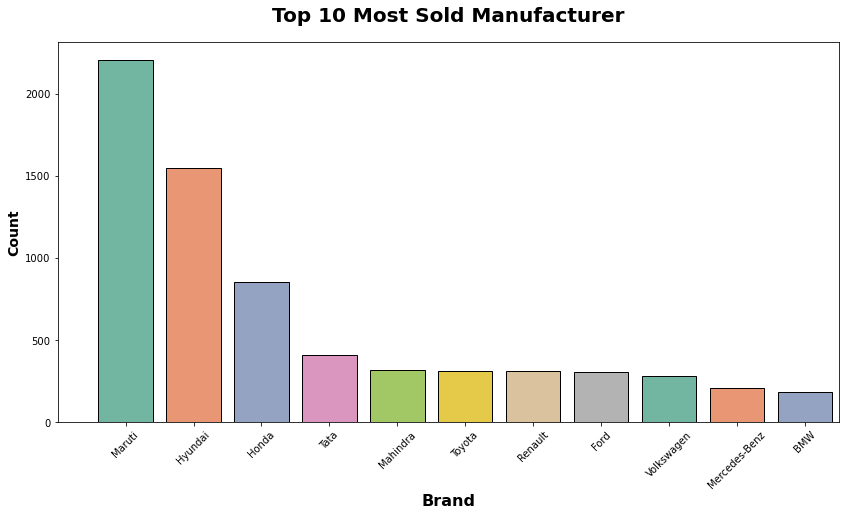

In [7]:
plt.subplots(figsize=(14,7))
sns.countplot(x="Manufacturer", data=df_filtered,ec = "black",palette="Set2",order = df_filtered['Manufacturer'].value_counts().index)
plt.title("Top 10 Most Sold Manufacturer", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=14)
plt.xlabel("Brand", weight="bold", fontsize=16)
plt.xticks(rotation= 45)
plt.xlim(-1,10.5)
plt.show()

# Top 10 Costlier Brands on CarDekho Website

In [8]:
brand = df_filtered.groupby('Manufacturer').Price.max()
brand = brand.to_frame().sort_values('Price',ascending=False)[0:10]

print('-'*50)
print('Top 10 Costlier Brands on CarDekho Website')
print('-'*50)

brand

--------------------------------------------------
Top 10 Costlier Brands on CarDekho Website
--------------------------------------------------


,Price
Manufacturer,
Audi,1657500.0
Land Rover,1657500.0
Volkswagen,1657500.0
Toyota,1657500.0
Tata,1657500.0
Skoda,1657500.0
Porsche,1657500.0
Mini,1657500.0
Mercedes-Benz,1657500.0


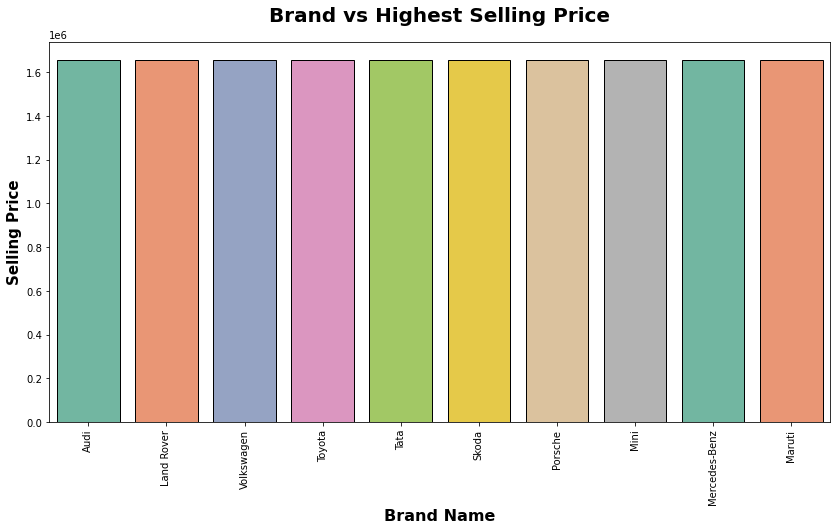

In [9]:
plt.subplots(figsize=(14,7))
sns.barplot(x=brand.index, y=brand.Price,ec = "black",palette="Set2")
plt.title("Brand vs Highest Selling Price", weight="bold",fontsize=20, pad=20)
plt.ylabel("Selling Price", weight="bold", fontsize=15)
plt.xlabel("Brand Name", weight="bold", fontsize=16)
plt.xticks(rotation=90)
plt.show()

# Top 10 Costlier Cars on CarDekho Website

In [10]:
car= df_filtered.groupby('CarModel').Price.max()
car =car.to_frame().sort_values('Price',ascending=False)[0:10]

print('-'*50)
print('Top 10 Costlier Cars on CarDekho Website')
print('-'*50)

car

--------------------------------------------------
Top 10 Costlier Cars on CarDekho Website
--------------------------------------------------


,Price
CarModel,
Volvo XC60,1657500.0
MG Astor,1657500.0
Land Rover Range Rover,1657500.0
Land Rover Range Rover Evoque,1657500.0
Land Rover Range Rover Sport,1657500.0
Land Rover Range Rover Velar,1657500.0
Skoda Kushaq,1657500.0
Lexus RX,1657500.0
MG Gloster,1657500.0


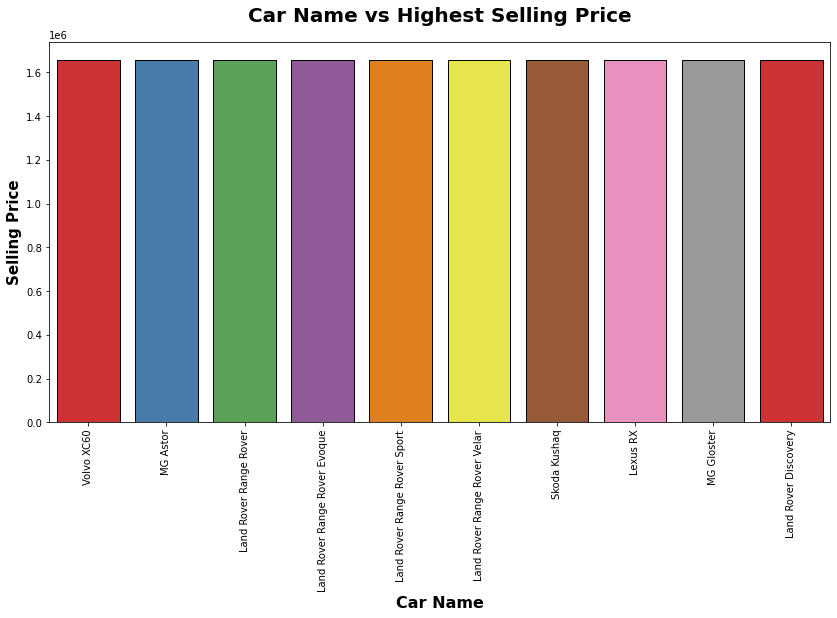

In [11]:
plt.subplots(figsize=(14,7))
sns.barplot(x=car.index, y=car.Price,ec = "black",palette="Set1")
plt.title("Car Name vs Highest Selling Price", weight="bold",fontsize=20, pad=20)
plt.ylabel("Selling Price", weight="bold", fontsize=15)
plt.xlabel("Car Name", weight="bold", fontsize=16)
plt.xticks(rotation=90)
plt.show()


# Most Mileage Car Brand on CarDekho Website

In [12]:
mileage= df_filtered.groupby('CarModel')['Mileage'].mean().sort_values(ascending=False).head(15)

print('-'*50)
print('Most Mileage Car Brand on CarDekho Website')
print('-'*50)

mileage.to_frame()

--------------------------------------------------
Most Mileage Car Brand on CarDekho Website
--------------------------------------------------


,Mileage
CarModel,
Mahindra e2o Plus,27.000000
Honda City Hybrid,26.000000
Tata Nano,25.454545
Maruti Celerio,24.178808
Renault Pulse,23.000000
Maruti Alto K10,22.951220
Renault KWID,22.825503
Maruti Vitara Brezza,22.648352
Maruti Alto 800,22.604938


# Most Mileage Car

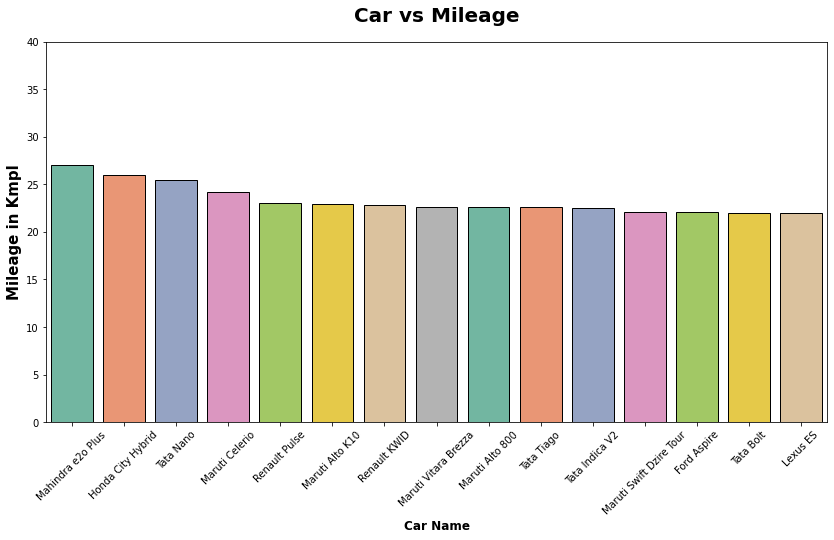

In [13]:
plt.subplots(figsize=(14,7))
sns.barplot(x=mileage.index, y=mileage.values, ec = "black", palette="Set2")
plt.title("Car vs Mileage", weight="bold",fontsize=20, pad=20)
plt.ylabel("Mileage in Kmpl", weight="bold", fontsize=15)
plt.xlabel("Car Name", weight="bold", fontsize=12)
plt.ylim(0,40)
plt.xticks(rotation=45)
plt.show()


# Selling Price and Kilometer Driven

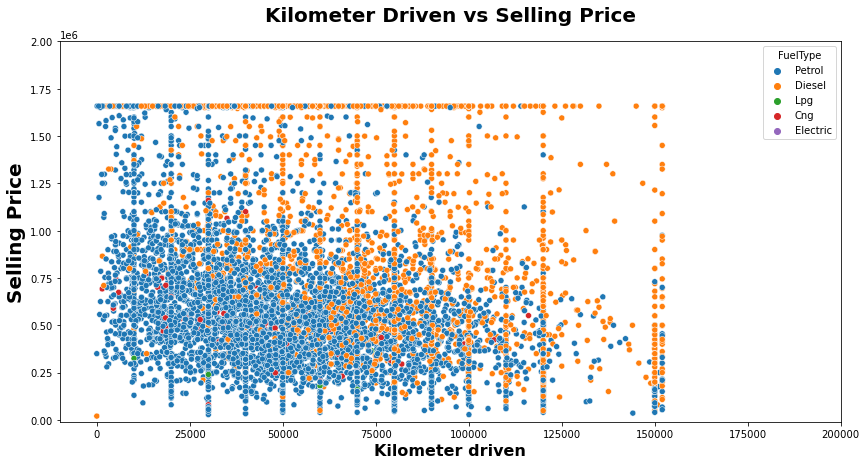

In [14]:
plt.subplots(figsize=(14,7))
sns.scatterplot(x="KmsDriven", y='Price', data=df_filtered, ec = "white", color='b', hue='FuelType')
plt.title("Kilometer Driven vs Selling Price", weight="bold",fontsize=20, pad=20)
plt.ylabel("Selling Price", weight="bold", fontsize=20)
plt.xlim(-10000,200000) #used limit for better visualization
plt.ylim(-10000,2000000)
plt.xlabel("Kilometer driven", weight="bold", fontsize=16)
plt.show()

# Fuel type vs Selling Price

In [15]:
fuel = df_filtered.groupby('FuelType')['Price'].median().sort_values(ascending=False)
fuel.to_frame()

,Price
FuelType,
Diesel,800000.0
Petrol,544000.0
Cng,498000.0
Electric,460000.0
Lpg,220000.0


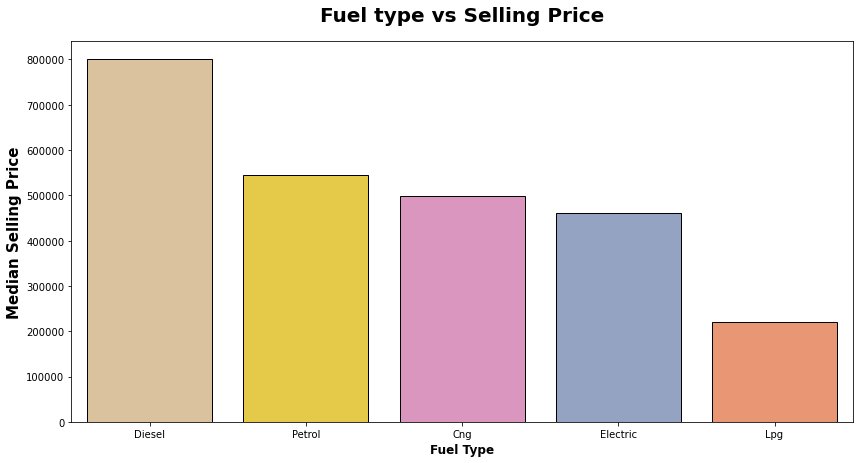

In [16]:
plt.subplots(figsize=(14,7))
sns.barplot(x=fuel.index, y=fuel.values, ec = "black", palette="Set2_r")
plt.title("Fuel type vs Selling Price", weight="bold",fontsize=20, pad=20)
plt.ylabel("Median Selling Price", weight="bold", fontsize=15)
plt.xlabel("Fuel Type", weight="bold", fontsize=12)
plt.show()

# Fuel Type Count

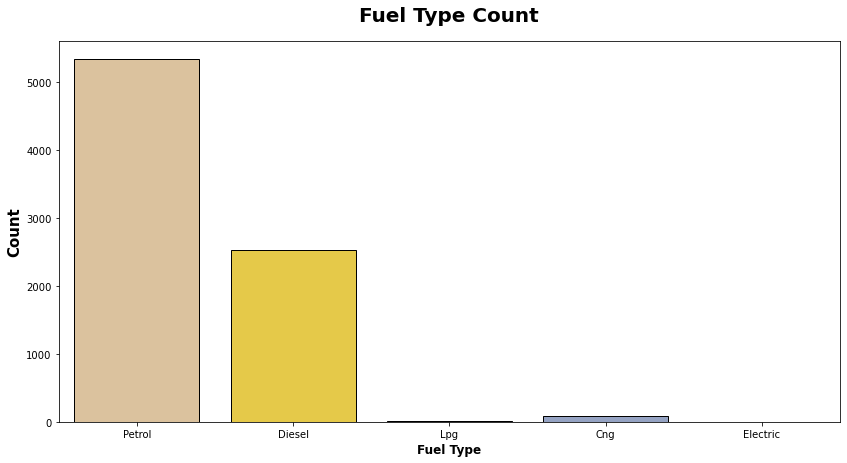

In [17]:
plt.subplots(figsize=(14,7))
sns.countplot(x=df_filtered.FuelType, ec = "black", palette="Set2_r")
plt.title("Fuel Type Count", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=15)
plt.xlabel("Fuel Type", weight="bold", fontsize=12)
plt.show()

# Fuel type vs Mileage

In [18]:
fuel_mileage = df_filtered.groupby('FuelType')['Mileage'].mean().sort_values(ascending=False)
fuel_mileage.to_frame()

df_filtered.Mileage.describe()

count    7966.000000
mean       18.805172
std         3.526665
min        11.000000
25%        17.000000
50%        18.000000
75%        21.000000
max        27.000000
Name: Mileage, dtype: float64

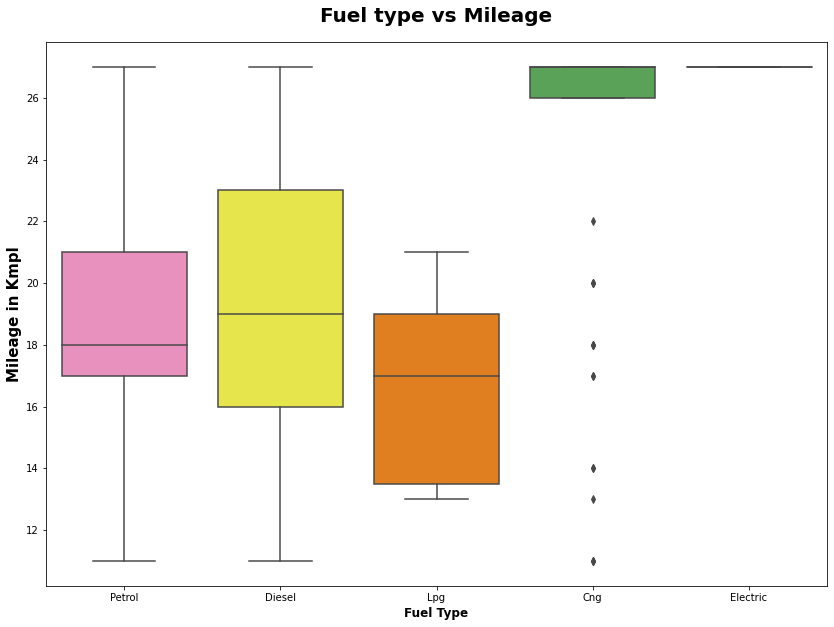

In [19]:
plt.subplots(figsize=(14,10))
sns.boxplot(x='FuelType', y='Mileage', data=df_filtered, palette="Set1_r")
plt.title("Fuel type vs Mileage", weight="bold",fontsize=20, pad=20)
plt.ylabel("Mileage in Kmpl", weight="bold", fontsize=15)
plt.xlabel("Fuel Type", weight="bold", fontsize=12)
plt.show()

# Mileage vs Selling Price

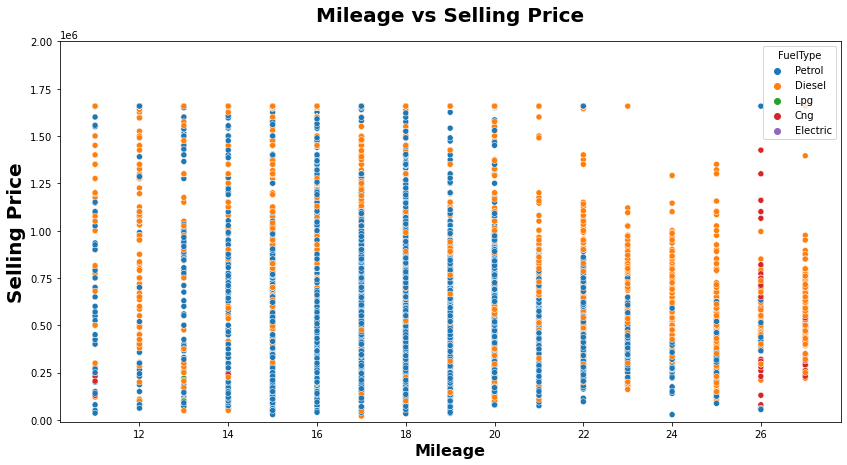

In [20]:
plt.subplots(figsize=(14,7))
sns.scatterplot(x="Mileage", y='Price', data=df_filtered,ec = "white",color='b', hue='FuelType')
plt.title("Mileage vs Selling Price", weight="bold",fontsize=20, pad=20)
plt.ylabel("Selling Price", weight="bold", fontsize=20)
plt.ylim(-10000,2000000)
plt.xlabel("Mileage", weight="bold", fontsize=16)
plt.show()

# Mileage Distribution

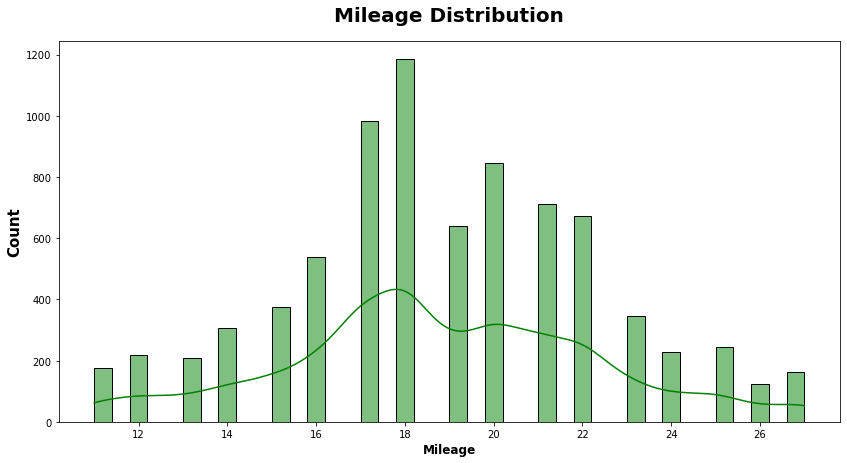

In [21]:
plt.subplots(figsize=(14,7))
sns.histplot(x=df_filtered.Mileage, ec = "black", color='g', kde=True)
plt.title("Mileage Distribution", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=15)
plt.xlabel("Mileage", weight="bold", fontsize=12)
plt.show()

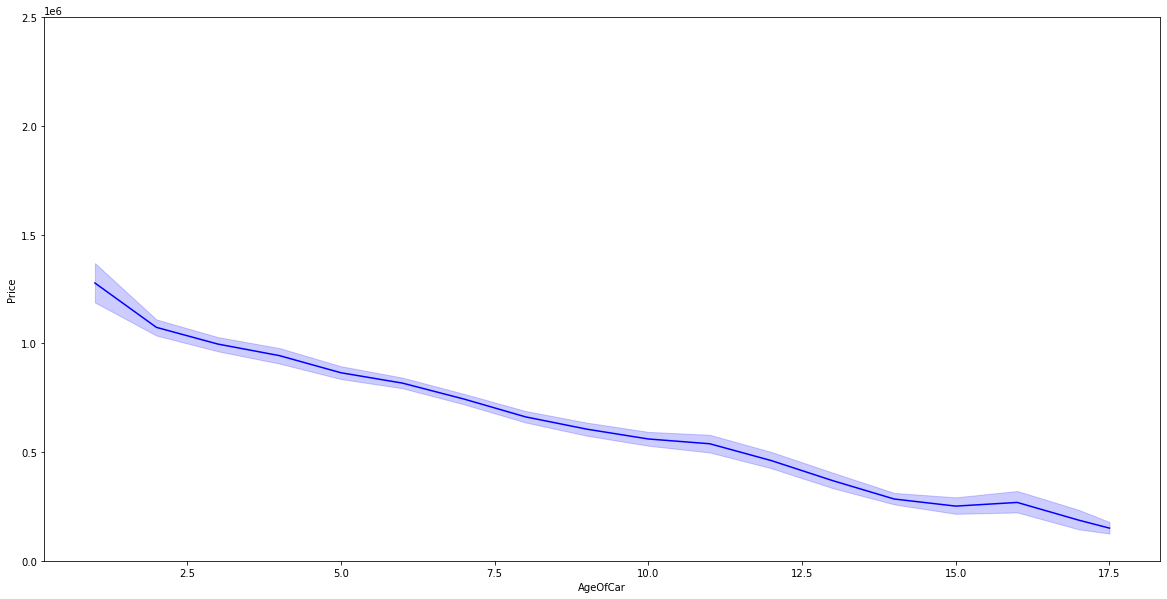

In [22]:
plt.subplots(figsize=(20,10))
sns.lineplot(x='AgeOfCar',y='Price',data=df_filtered,color='b')
plt.ylim(0,2500000)
plt.show()

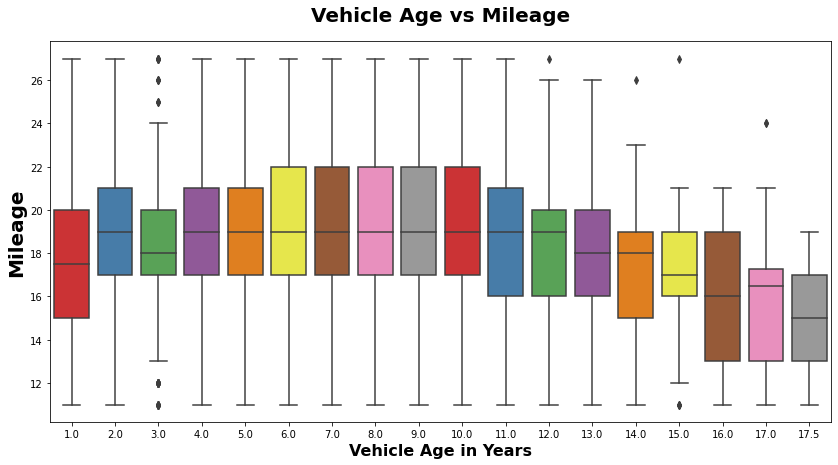

In [23]:
plt.subplots(figsize=(14,7))
sns.boxplot(x=df_filtered.AgeOfCar, y= df_filtered.Mileage, palette="Set1")
plt.title("Vehicle Age vs Mileage", weight="bold",fontsize=20, pad=20)
plt.ylabel("Mileage", weight="bold", fontsize=20)
plt.xlabel("Vehicle Age in Years", weight="bold", fontsize=16)
plt.show()

In [24]:
oldest = df_filtered.groupby('CarModel')['AgeOfCar'].max().sort_values(ascending=False).head(10)
oldest.to_frame()

,AgeOfCar
CarModel,
Ambassador,17.5
Maruti Zen,17.5
Tata Indica,17.5
Skoda Octavia,17.5
Skoda Laura,17.5
OpelCorsa,17.5
Ford Ikon,17.5
Ford Mondeo,17.5
Honda CR-V,17.5


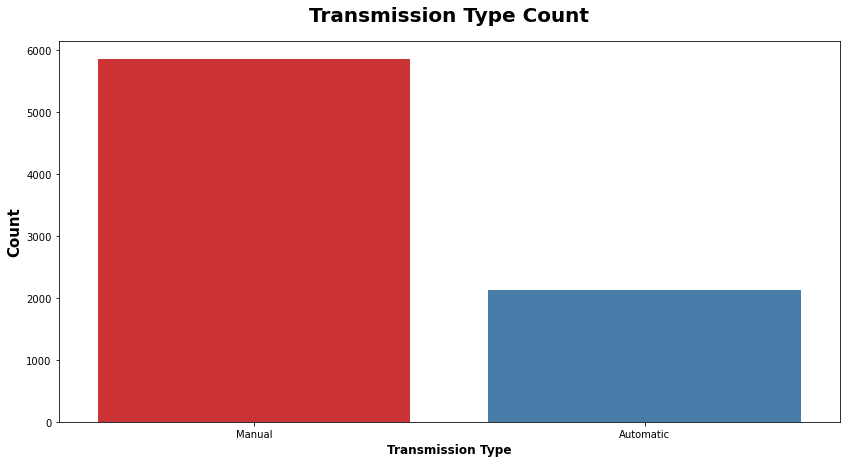

In [25]:
plt.subplots(figsize=(14,7))
sns.countplot(x='TransmissionType', data=df_filtered, palette="Set1")
plt.title("Transmission Type Count", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=15)
plt.xlabel("Transmission Type", weight="bold", fontsize=12)
plt.show() 

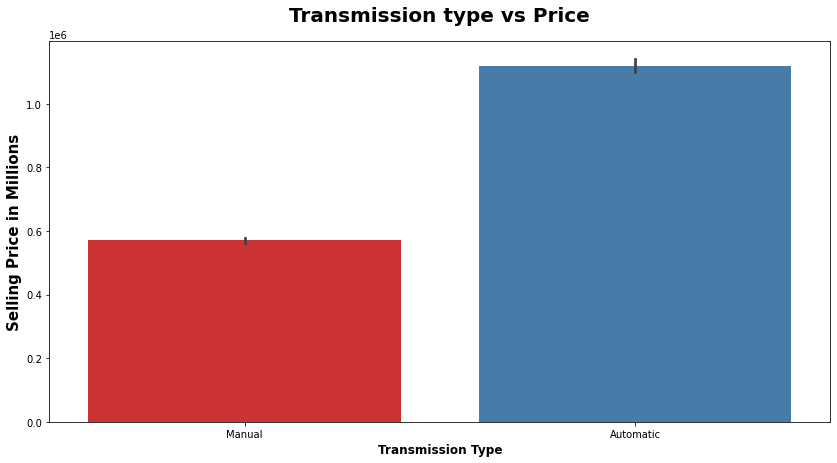

In [26]:
plt.subplots(figsize=(14,7))
sns.barplot(x='TransmissionType', y='Price', data=df_filtered, palette="Set1")
plt.title("Transmission type vs Price", weight="bold",fontsize=20, pad=20)
plt.ylabel("Selling Price in Millions", weight="bold", fontsize=15)
plt.xlabel("Transmission Type", weight="bold", fontsize=12)
plt.show() 